# Linear Regression Notes

Linear regression assumptions:
All variables are continuous numeric, not categorical
Data is free of missing values and outliers
There's a linear relationship between predcitors and predictant
All predictor are independent of each other
Residuals (aka prediction errors) are normally distributed.

In [6]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [7]:
%matplotlib inline
rcParams('figure.figsize') = 5, 4
sb.set_style('whitegrid')

SyntaxError: can't assign to function call (<ipython-input-7-63669acc36bb>, line 2)

### (Multiple) linear regression on the enrollment data

In [12]:
address = "/Users/ChristianHaroldNunez/Desktop/Physics91SI/final-project-christianhnunez/enrollment_forecast.csv"
enroll = pd.read_csv(address)
enroll.columns = ['year','roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


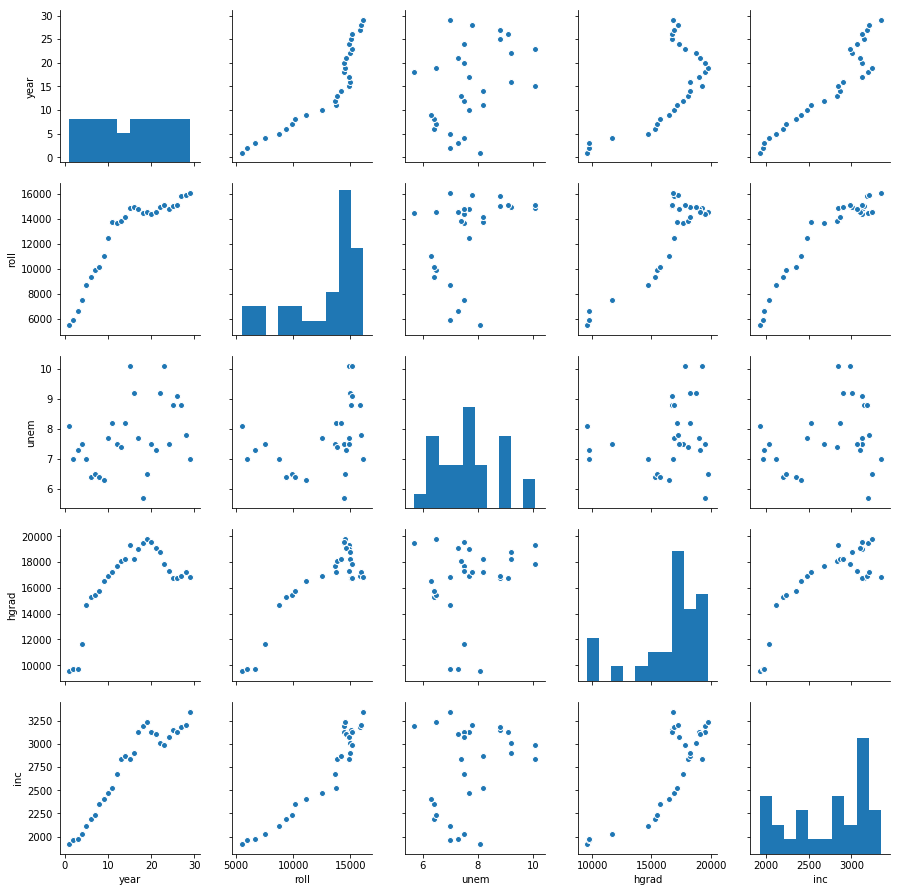

In [13]:
sb.pairplot(enroll)

In [14]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [15]:
enroll_data = enroll.ix[:, (2,3)].values
enroll_target = enroll.ix[:,1].values
enroll_data_names = ['unem', 'hgrad']
X, y = scale(enroll_data), enroll_target

/Users/ChristianHaroldNunez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


## Checking for missing values

In [16]:
missing_values = X == np.NAN
X[missing_values] == True ## run this, see where there are missing values

array([], dtype=bool)

In [18]:
LinReg = LinearRegression(normalize = True)
LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723
